In [244]:
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

In [245]:
data = pd.read_csv('diabetes.data.csv', sep='\t')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [246]:
target = 'Y'
X = data.drop([target], axis=1)
y = data[target]

X.shape, y.shape

((442, 10), (442,))

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [248]:
data.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


# Посмотрим на зависимость таргета от признаков

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


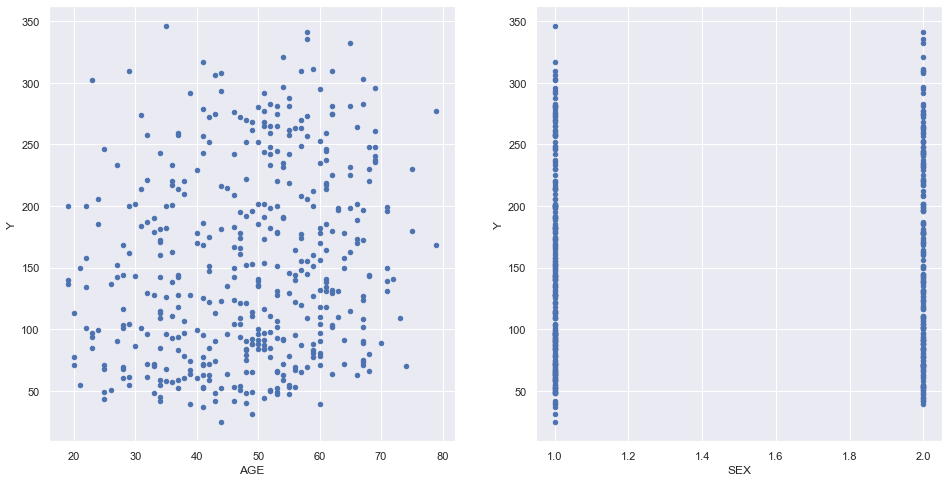

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


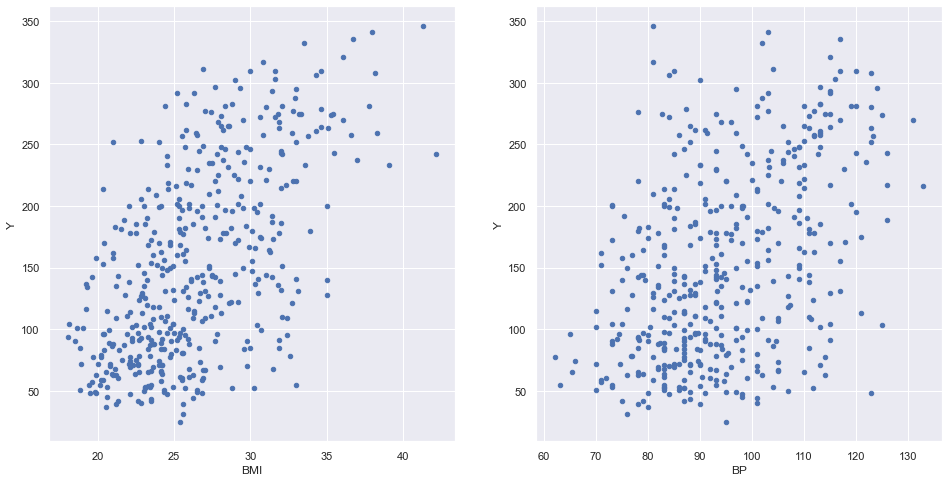

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


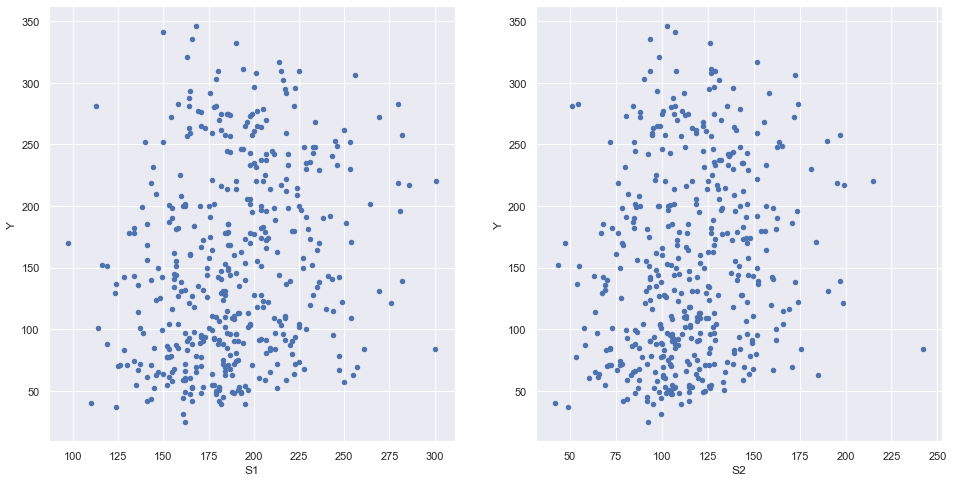

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


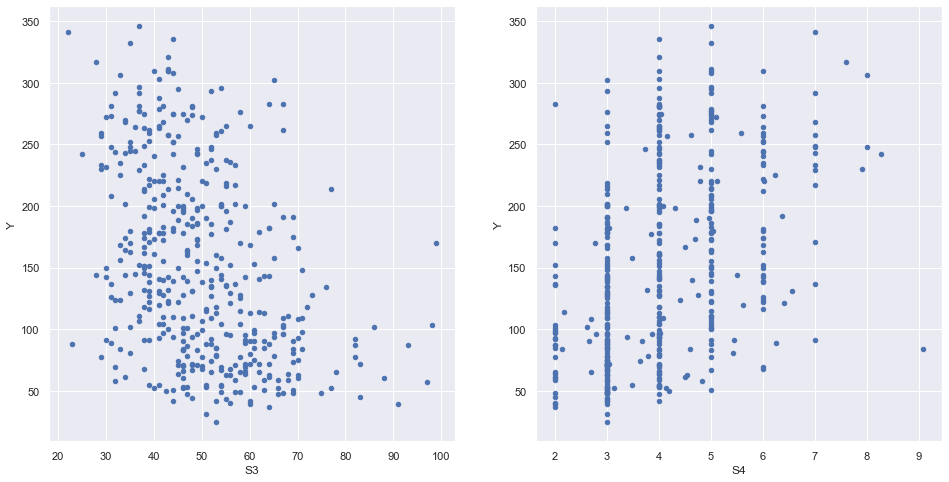

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


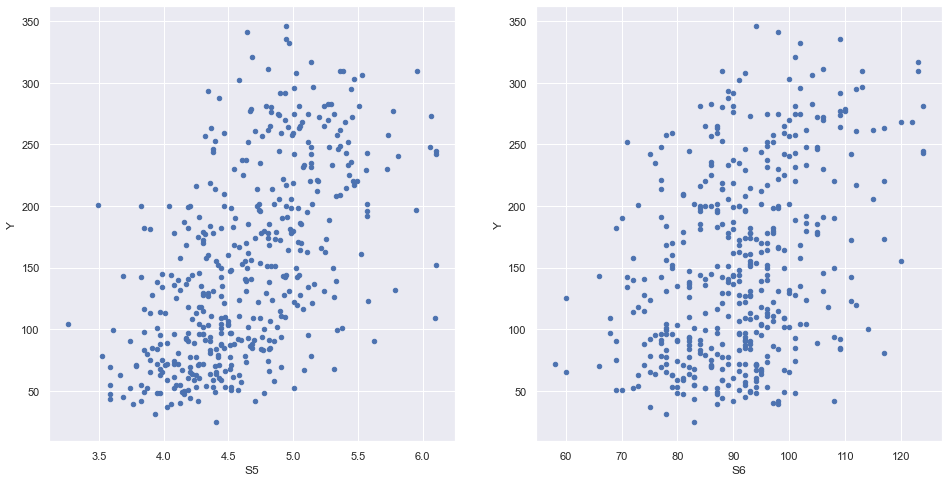

In [249]:
fig, axs = plt.subplots(1, 2,)
data.plot(kind='scatter', x='AGE', y="Y", ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='SEX', y='Y', ax=axs[1])
plt.show()

fig, axs = plt.subplots(1, 2,)
data.plot(kind='scatter', x='BMI', y='Y', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='BP', y='Y', ax=axs[1])
plt.show()

fig, axs = plt.subplots(1, 2,)
data.plot(kind='scatter', x='S1', y='Y', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='S2', y='Y', ax=axs[1])
plt.show()

fig, axs = plt.subplots(1, 2,)
data.plot(kind='scatter', x='S3', y='Y', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='S4', y='Y', ax=axs[1])
plt.show()

fig, axs = plt.subplots(1, 2,)
data.plot(kind='scatter', x='S5', y='Y', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='S6', y='Y', ax=axs[1])
plt.show()

Больше всего линейно зависимы на вид признаки BMI и S5

Мы видим, что возраст распределен равномерно и вряд ли таргет сильно связан с ним. Можно будет попробовать его убрать.

Так же заметим что S4 распределенн группами по целым числам. Значит остальное скорее всего выбросы. Позже попробуем убрать их

# Рассмотрим распределение признаков


In [250]:
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


[]

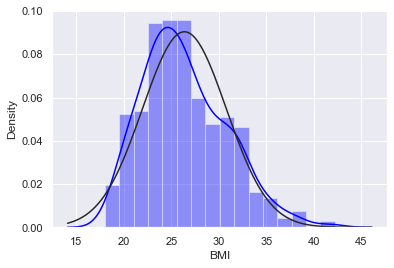

In [251]:
from scipy.stats import norm, skew
sns.distplot(data['BMI'], fit = norm, kde = True, color = 'blue')
plt.plot()

В принципе все признаки распределены +- нормально. Только S4 явно похож на категориальный признак.

# Посмотрим на корреляцию признаков

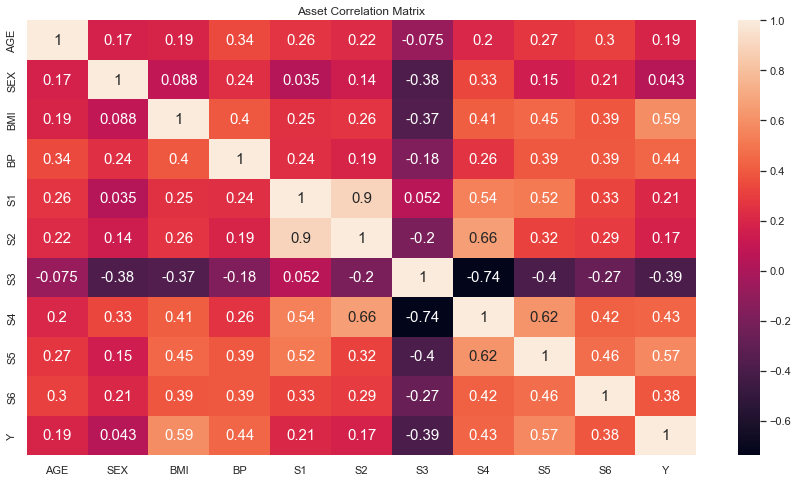

In [252]:
from numpy import corrcoef as corr
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr(),
            annot = True,
            annot_kws={'size': 15})

plt.title('Asset Correlation Matrix')
plt.show()

1) Мы видим что таргет достаточно сильно коррелирует с BMI и S5. И очень слабо с ПОЛОМ
2) Также С1 и С2 сильно кор. между собой. А также С3 и С4, С2 и С4, С5 и С4, С1 и С4.

# Переходим к обучению

In [253]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)


In [254]:
reg = LinearRegression().fit(X_train, y_train)

print('R^2 на трейне', reg.score(X_train, y_train))
print('R^2 на тесте', reg.score(X_test, y_test))
print("Сдвиг = {}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {} = {}".format(column, coef))


R^2 на трейне 0.5279193863361497
R^2 на тесте 0.4526027629719197
Сдвиг = -341.3782363335059
Коэффициент для AGE = 0.13768781500240612
Коэффициент для SEX = -23.064467722825
Коэффициент для BMI = 5.846362651490294
Коэффициент для BP = 1.1970925183253556
Коэффициент для S1 = -1.2816847398758888
Коэффициент для S2 = 0.811152025742583
Коэффициент для S3 = 0.6016531873240509
Коэффициент для S4 = 10.159539165455591
Коэффициент для S5 = 67.10896239682859
Коэффициент для S6 = 0.20159906669849192


Увидим что коэф. у ВОЗРАСТА и S6 достаточно малы. Может стоит попробовать их совсем убрать. 

# Попробуем выкинуть ненужные признаки

для этого рассмотрим p-value(являются ли наши параметры статистически важными) и VIF(мультиколлинеарность)

если p-value > 0.05 То мы можем усомниться в том что этот признак влияет на трагет. 

In [255]:
import statsmodels.api as sm

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
res = model.fit()

pd.DataFrame({'coefs':res.params, 'p-value':round(res.pvalues, 3)})

,coefs,p-value
const,-341.378236,0.000
AGE,0.137688,0.583
SEX,-23.064468,0.000
BMI,5.846363,0.000
BP,1.197093,0.000
S1,-1.281685,0.040
S2,0.811152,0.156
S3,0.601653,0.484
S4,10.159539,0.138
S5,67.108962,0.000


Как мы видим такие признаки: Age, s2, s3, s4, s6. S3, S5, AGE - особенно

# Теперь проверим на мультиколлинеарность

In [256]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(exog=X_incl_const, exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'Coef_name':X_incl_const.columns, 'vif':np.around(vif, 2)})

,Coef_name,vif
0,const,654.16
1,AGE,1.22
2,SEX,1.27
3,BMI,1.57
4,BP,1.42
5,S1,55.25
6,S2,35.76
7,S3,14.29
8,S4,9.33
9,S5,10.07


Больше 10 у S1, S2, S3 u S5

посчитаем bic нашей модели (насколько она проста)

In [257]:
# model without changes
print('BIC: ', res.bic)
print('R^2: ', res.rsquared)

BIC:  3876.7330864749333
R^2:  0.5279193863361497


А теперь выкидываем ненужные признаки ( пробуем )

In [258]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)

res = model.fit()

org_coef = pd.DataFrame({'coefs':res.params, 'p-value':round(res.pvalues, 3)})

print('BIC: ', res.bic)
print('R^2: ', res.rsquared)

BIC:  3876.7330864749333
R^2:  0.5279193863361497


Выкидываем разные признаки и проверяем результаты. В итоге Оптимально было выкинуть 'AGE', 'S2', 'S6', 'S3'

In [259]:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['AGE', 'S6', 'S3', 'S2'], axis=1)

model = sm.OLS(y_train, X_incl_const)

res = model.fit()

coef_reduced = pd.DataFrame({'coefs':res.params, 'p-value':round(res.pvalues, 3)})

print('BIC: ', res.bic)
print('R^2: ', res.rsquared)

vif = [variance_inflation_factor(exog=X_incl_const, exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'Coef_name':X_incl_const.columns, 'vif':np.around(vif, 2)})

BIC:  3856.702998874847
R^2:  0.5233021444871313


,Coef_name,vif
0,const,118.78
1,SEX,1.23
2,BMI,1.50
3,BP,1.33
4,S1,1.64
5,S4,2.25
6,S5,2.01


In [260]:
frames = [org_coef, coef_reduced]
pd.concat(frames, axis=1)

,coefs,p-value,coefs,p-value
const,-341.378236,0.000,-270.164637,0.000
AGE,0.137688,0.583,NaN,NaN
SEX,-23.064468,0.000,-21.895269,0.001
BMI,5.846363,0.000,6.144820,0.000
BP,1.197093,0.000,1.251442,0.000
S1,-1.281685,0.040,-0.493351,0.000
S2,0.811152,0.156,NaN,NaN
S3,0.601653,0.484,NaN,NaN
S4,10.159539,0.138,12.058176,0.000
S5,67.108962,0.000,46.847901,0.000


Теперь у нас низкое p-value у всез признаков. А BIC упало на 20 единиц.

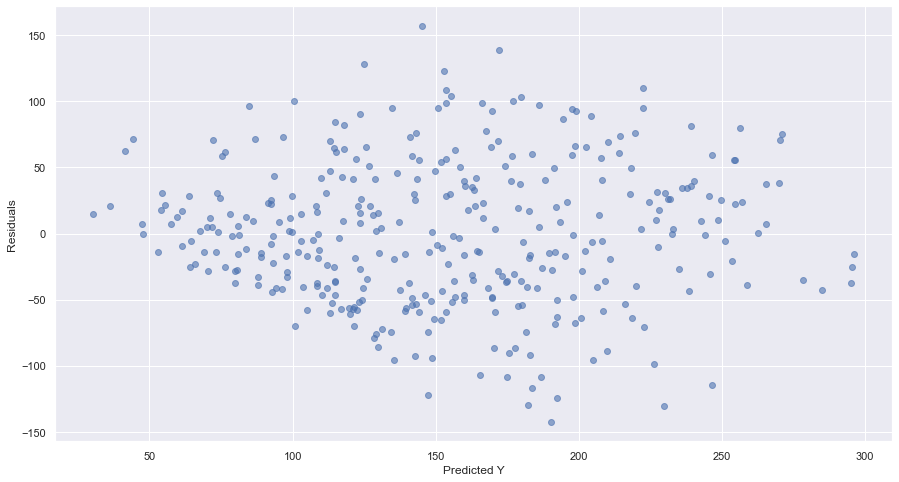

In [261]:
X_new = X.drop(['AGE', 'S6', 'S3'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
X_new, y, test_size=0.2, random_state=42)
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)

res = model.fit()

plt.scatter(x=res.fittedvalues, y=res.resid, alpha=0.6)
plt.ylabel('Residuals')
plt.xlabel('Predicted Y')
plt.show()

Разброс вполне нормальный (рандомный)

0.07150967875702036


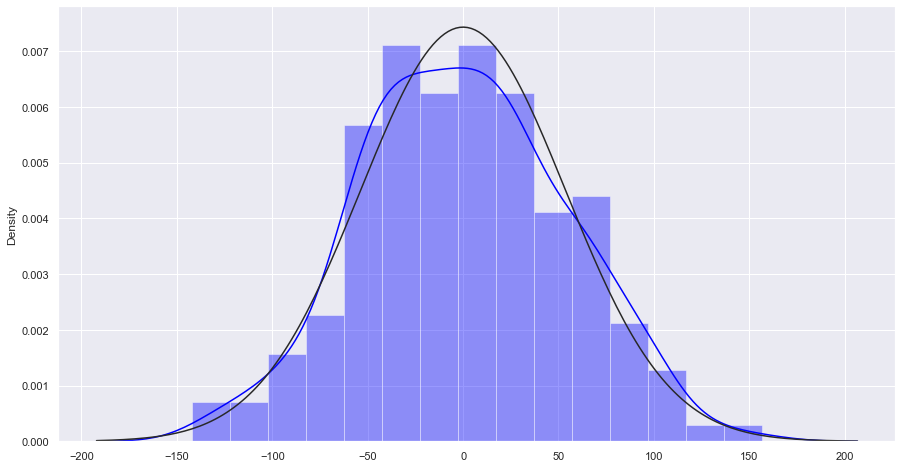

In [262]:
sns.distplot(res.resid, fit = norm, kde = True, color = 'blue')
plt.plot()
print(skew(res.resid))

Распределение тоже вполне норм, Skew - норм

# Теперь попробуем использовать регуляризацию.

In [263]:
from sklearn.metrics import mean_squared_error
reg = LinearRegression().fit(X_new, y)
y_pred = reg.predict(X_new)
print(mean_squared_error(y, y_pred))


2868.3434662013815


In [264]:
from sklearn.model_selection import cross_val_score
X_new = X.drop(['AGE', 'S6', 'S3'], axis=1)
errors = -cross_val_score(LinearRegression(), X_new, y, cv=5, scoring='neg_mean_squared_error')
print(np.mean(errors))

2944.899109086118


Мы забыли еще попробовать убрать возможные выбросы в S4. Попробуем:

In [265]:
X_new_2 = X_new[X_new['S4'].isin([1,2,3,4,5,6,7,8,9])]
y_new = y[X_new['S4'].isin([1,2,3,4,5,6,7,8,9])]

In [266]:
errors = -cross_val_score(LinearRegression(), X_new_2, y_new, cv=5, scoring='neg_mean_squared_error')
print(np.mean(errors))

2891.5873033267717


Ошибка сильно уменьшилась. Так и оставим.

In [267]:
X_new = X_new_2
y = y_new

В принципе отличия не сильные. Но все равно попробуем регуляризацию

In [268]:
from sklearn.linear_model import Ridge, Lasso
lambdas = np.arange(0.1, 3.0, 0.2)

print("Все лямбды:")
print(lambdas)


lambda_errors = []


for val in lambdas:
    reg = Ridge(alpha=val).fit(X_new, y)
    y_pred = reg.predict(X_new)
    lambda_errors.append((val, mean_squared_error(y_pred, y)))
    print(((val, mean_squared_error(y_pred, y))))
    

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])


best_reg = Ridge(alpha=min_val)
cv_error = -np.mean(cross_val_score(best_reg, X_new, y, cv=5, scoring='neg_mean_squared_error'))

print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))

Все лямбды:
[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9]
(0.1, 2782.1404626607496)
(0.30000000000000004, 2782.178604104013)
(0.5000000000000001, 2782.252789571776)
(0.7000000000000001, 2782.3609554490913)
(0.9000000000000001, 2782.501160456745)
(1.1000000000000003, 2782.6715775812895)
(1.3000000000000003, 2782.8704865997624)
(1.5000000000000004, 2783.0962671504817)
(1.7000000000000004, 2783.3473923056363)
(1.9000000000000004, 2783.622422605365)
(2.1000000000000005, 2783.9200005165903)
(2.3000000000000007, 2784.2388452830423)
(2.5000000000000004, 2784.5777481359014)
(2.7000000000000006, 2784.935567837032)
(2.900000000000001, 2785.311226529252)

Оптимальная lambda:
Lambda=0.10, результат=2891.50


In [269]:
lambdas = np.arange(0.1, 3.0, 0.2)

print("Все лямбды:")
print(lambdas)


lambda_errors = []


for val in lambdas:
    reg = Lasso(alpha=val).fit(X_new, y)
    y_pred = reg.predict(X_new)
    lambda_errors.append((val, mean_squared_error(y_pred, y)))
    print(((val, mean_squared_error(y_pred, y))))
    

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])


best_reg = Lasso(alpha=min_val)
cv_error = -np.mean(cross_val_score(best_reg, X_new, y, cv=5, scoring='neg_mean_squared_error'))

print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))

Все лямбды:
[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9]
(0.1, 2782.315002754116)
(0.30000000000000004, 2783.7500103096827)
(0.5000000000000001, 2786.6195723493965)
(0.7000000000000001, 2790.9235263710375)
(0.9000000000000001, 2796.661950261743)
(1.1000000000000003, 2803.8347776860924)
(1.3000000000000003, 2812.4418727106095)
(1.5000000000000004, 2822.4835978545966)
(1.7000000000000004, 2833.9595966045044)
(1.9000000000000004, 2846.8700297489604)
(2.1000000000000005, 2857.0473519083093)
(2.3000000000000007, 2870.745173528729)
(2.5000000000000004, 2886.8256206522274)
(2.7000000000000006, 2904.2452066553365)
(2.900000000000001, 2922.8179182506583)

Оптимальная lambda:
Lambda=0.10, результат=2891.38


In [270]:
lambdas = np.arange(0.1, 5.0, 0.2)
lambda_errors = []

for val in lambdas:
    lambda_errors.append((val,-np.mean(cross_val_score(Ridge(alpha=val), X_new, y, cv=5, scoring='neg_mean_squared_error'))))
    print(((val, -np.mean(cross_val_score(Ridge(alpha=val), X_new, y, cv=5, scoring='neg_mean_squared_error')))))
    

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])

best_reg = Ridge(alpha=min_val)
cv_error = -np.mean(cross_val_score(best_reg, X_new, y, cv=5, scoring='neg_mean_squared_error'))

print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))

(0.1, 2891.5013513746976)
(0.30000000000000004, 2891.3768545683943)
(0.5000000000000001, 2891.3118719291706)
(0.7000000000000001, 2891.3022567245775)
(0.9000000000000001, 2891.3441664480915)
(1.1000000000000003, 2891.4340379185705)
(1.3000000000000003, 2891.568564656616)
(1.5000000000000004, 2891.744676306958)
(1.7000000000000004, 2891.9595199016685)
(1.9000000000000004, 2892.210442781702)
(2.1000000000000005, 2892.4949770140843)
(2.3000000000000007, 2892.810825159645)
(2.5000000000000004, 2893.1558472616625)
(2.7000000000000006, 2893.5280489394295)
(2.900000000000001, 2893.9255704829)
(3.1000000000000005, 2894.34667685526)
(3.3000000000000007, 2894.789748519792)
(3.500000000000001, 2895.253273015892)
(3.7000000000000006, 2895.7358372165754)
(3.900000000000001, 2896.2361202065504)
(4.1000000000000005, 2896.752886725899)
(4.300000000000001, 2897.284981129748)
(4.500000000000001, 2897.831321819103)
(4.7, 2898.3908961022707)
(4.9, 2898.9627554501394)

Оптимальная lambda:
Lambda=0.70, резу

нормализуем данные:

In [271]:
for c in X_new.columns:
    X_new[c] = (X_new[c] - X_new[c].mean())/X_new[c].std()
X_new

,SEX,BMI,BP,S1,S2,S4,S5
0,1.019934,1.351672,0.443630,-0.913279,-0.707658,0.006333,0.447922
1,-0.977875,-1.049134,-0.575271,-0.141868,-0.365254,-0.795845,-1.419618
2,1.019934,0.985835,-0.138599,-0.942948,-0.693961,0.006333,0.087147
3,-0.977875,-0.203136,-0.793607,0.303177,0.600323,0.808511,0.506765
4,-0.977875,-0.729027,0.443630,0.125159,0.394881,0.006333,-0.650415
...,...,...,...,...,...,...,...
435,-0.977875,-0.454649,-0.866385,-0.319886,0.155199,0.006333,-0.787394
436,-0.977875,-1.529295,-1.084721,-0.497904,-0.974732,-1.598023,-1.268170
437,1.019934,0.459944,1.244194,-0.082528,-0.002307,0.006333,0.686767
438,1.019934,-0.294595,-1.448614,1.104257,1.785039,0.808511,-0.356779


In [272]:
print(-np.mean(cross_val_score(Ridge(alpha=3.3), X_new, y, cv=5, scoring='neg_mean_squared_error')))

2889.629156454709


# ИТОГО: 2889,6